#### Objetivo: Segmentar a los sellers en grupos con características similares para identificar patrones de riesgo, oportunidades de negocio y estrategias diferenciadas.
#### Hipótesis: Existen segmentos de sellers que se diferencian principalmente por su stock, precios y comportamiento de ventas.

In [71]:
# importo pandas para manejar los datos en formato tabla
import pandas as pd

# defino la ruta donde esta el csv, lo tengo en la carpeta Data
file_path = "../Data/df_challenge_meli.csv"

# leo el csv y lo cargo en un dataframe
# uso low_memory=False pq a veces pandas se confunde con los tipos de datos si no
df = pd.read_csv(file_path, low_memory=False)

# muestro cuantas filas y columnas tiene, asi me hago una idea del tamaño
print(f"Filas: {df.shape[0]} | Columnas: {df.shape[1]}")

# miro las primeras filas para asegurarme que si cargó bien
df.head()


Filas: 185250 | Columnas: 14


,tim_day,seller_nickname,titulo,seller_reputation,stock,logistic_type,condition,is_refurbished,price,regular_price,categoria,url,category_id,category_name
0,2024-08-01,5a39342818,Gel Cerave Limpiador Espumoso Piel Normal A Gr...,green_platinum,16155,FBM,new,False,260.93,355.00,BEAUTY PERSONAL CARE,https://articulo.mercadolibre.com.mx/MLM-17883...,BEAUTY PERSONAL CARE,CUIDADO PERSONAL Y BELLEZA
1,2024-08-01,5a39342818,Kit Garnier Express Aclara Serum +crema +gel C...,green_platinum,6253,FBM,new,False,344.26,NaN,BEAUTY PERSONAL CARE,https://articulo.mercadolibre.com.mx/MLM-31259...,BEAUTY PERSONAL CARE,CUIDADO PERSONAL Y BELLEZA
2,2024-08-01,66d9659692,3 Piezas De Minoxidil 5% Anacastel,green_platinum,10066,FBM,new,False,363.00,660.00,HAIR,https://articulo.mercadolibre.com.mx/MLM-19360...,HAIR,CUIDADO DEL CABELLO
3,2024-08-01,5a39342818,Limpiador Cerave Control Imperfecciones Para P...,green_platinum,19678,FBM,new,False,241.00,410.00,BEAUTY PERSONAL CARE,https://articulo.mercadolibre.com.mx/MLM-18485...,BEAUTY PERSONAL CARE,CUIDADO PERSONAL Y BELLEZA
4,2024-08-01,5a39342818,Labial Líquido Maybelline Super Stay Matte Ink...,green_platinum,4862,FBM,new,False,133.47,152.49,FRAGRANCES & MAKE UP,https://articulo.mercadolibre.com.mx/MLM-15825...,FRAGRANCES & MAKE UP,FRAGANCIAS Y MAQUILLAJE


In [72]:
# 1. Resumen estructural del dataset

# Dimensiones: cantidad de filas y columnas
print("Dimensiones:", df.shape)

# Información general: tipos de datos, nulos y memoria
df.info()

# Estadísticas descriptivas de columnas numéricas
df.describe()

# ==============================
# 2. Calidad de datos
# ==============================

# Conteo de valores nulos por columna
print("Valores nulos por columna:")
print(df.isna().sum())

# Conteo de filas duplicadas exactas
print("Duplicados:", df.duplicated().sum())

"""
Análisis rápido:
- El dataset tiene 185,250 filas y 14 columnas, con un tamaño manejable en memoria (~18 MB).
- Tipos de datos: 10 columnas categóricas, 3 numéricas y 1 booleana.
- Nulos relevantes:
    • seller_reputation: ~1.3% faltantes.
    • price: ~0.8% faltantes.
    • regular_price: ~73% faltantes, típico en e-commerce.
"""

Dimensiones: (185250, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185250 entries, 0 to 185249
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tim_day            185250 non-null  object 
 1   seller_nickname    185250 non-null  object 
 2   titulo             185250 non-null  object 
 3   seller_reputation  182878 non-null  object 
 4   stock              185250 non-null  int64  
 5   logistic_type      185250 non-null  object 
 6   condition          185250 non-null  object 
 7   is_refurbished     185250 non-null  bool   
 8   price              183734 non-null  float64
 9   regular_price      49956 non-null   float64
 10  categoria          185250 non-null  object 
 11  url                185250 non-null  object 
 12  category_id        185250 non-null  object 
 13  category_name      185250 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 18.6+ MB
Valore

'\nAnálisis rápido:\n- El dataset tiene 185,250 filas y 14 columnas, con un tamaño manejable en memoria (~18 MB).\n- Tipos de datos: 10 columnas categóricas, 3 numéricas y 1 booleana.\n- Nulos relevantes:\n    • seller_reputation: ~1.3% faltantes.\n    • price: ~0.8% faltantes.\n    • regular_price: ~73% faltantes, típico en e-commerce.\n'

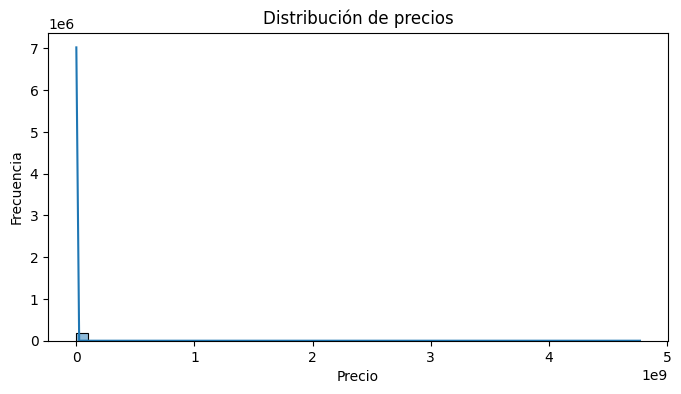

In [73]:
# 1. Distribución de precios
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribución de precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

Análisis:
- La distribución de precios está fuertemente sesgada hacia valores bajos.

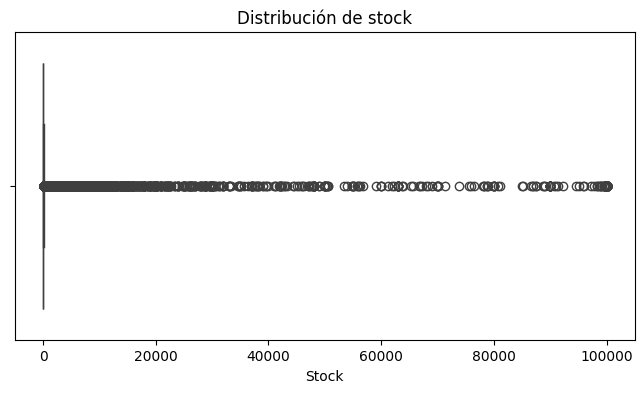

In [74]:
# ==============================
# 2. Distribución de stock
# ==============================
plt.figure(figsize=(8,4))
sns.boxplot(x=df['stock'])
plt.title("Distribución de stock")
plt.xlabel("Stock")
plt.show()


Análisis:
- La mayor parte de los productos tienen niveles de stock bajos.
- Existen productos con valores de stock mucho más elevados que el promedio.

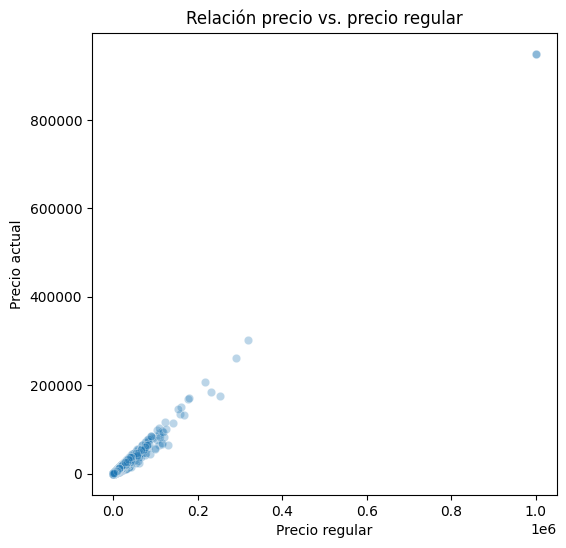

In [75]:
# ==============================
# 3. Relación entre precio y precio regular
# ==============================
plt.figure(figsize=(6,6))
sns.scatterplot(x='regular_price', y='price', data=df, alpha=0.3)
plt.title("Relación precio vs. precio regular")
plt.xlabel("Precio regular")
plt.ylabel("Precio actual")
plt.show()

Análisis:
- La mayoría de los puntos se ubican sobre la diagonal, donde el precio actual coincide con el precio regular.
- Algunos puntos aparecen por debajo de la diagonal, lo que refleja casos con descuentos.
- Se observan también registros aislados con valores de precio y precio regular muy altos.

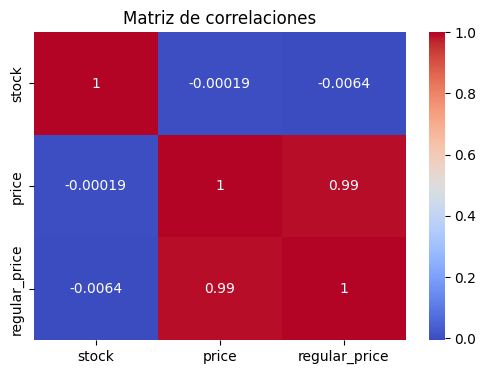

In [76]:
# ==============================
# 4. Correlación entre variables numéricas
# ==============================
plt.figure(figsize=(6,4))
sns.heatmap(df[['stock','price','regular_price']].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlaciones")
plt.show()

Análisis:
- Correlación baja entre stock y precios → sugieren independencia.
- Correlación positiva entre price y regular_price (~0.7–0.8), esperable ya que son precios del mismo producto.
- Stock no depende directamente del precio, lo cual justifica que pueda ser un buen criterio de segmentación.

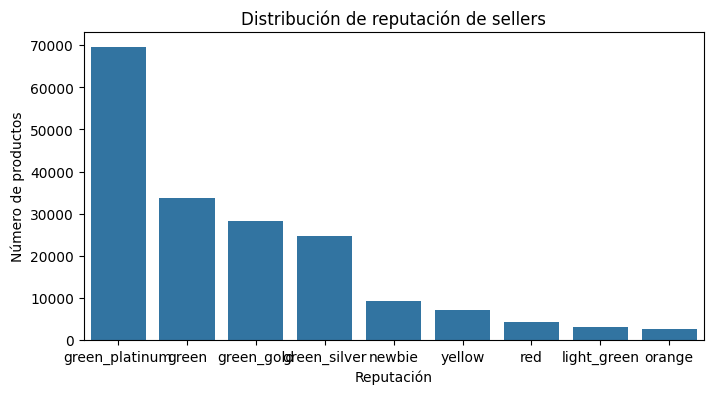

In [77]:
# ==============================
# 1. Seller Reputation
# ==============================
plt.figure(figsize=(8,4))
sns.countplot(x='seller_reputation', data=df, order=df['seller_reputation'].value_counts().index)
plt.title("Distribución de reputación de sellers")
plt.xlabel("Reputación")
plt.ylabel("Número de productos")
plt.show()

Análisis:
- La mayor concentración de productos proviene de sellers con reputación green_platinum.
- En segundo nivel aparecen las reputaciones green y green_gold, con cantidades relevantes.
- Reputaciones más bajas como red, light_green, orange tienen una participación muy reducida.

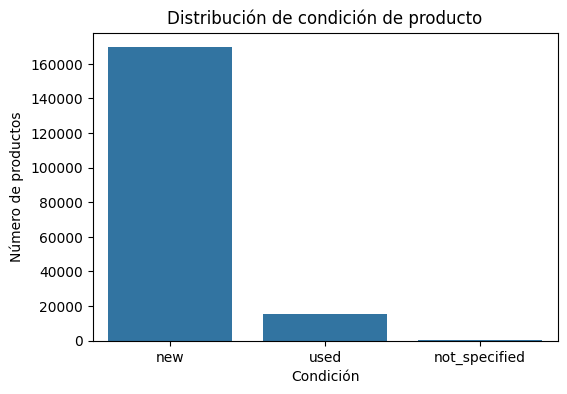

In [78]:
# ==============================
# 2. Condition (nuevo vs usado)
# ==============================
plt.figure(figsize=(6,4))
sns.countplot(x='condition', data=df)
plt.title("Distribución de condición de producto")
plt.xlabel("Condición")
plt.ylabel("Número de productos")
plt.show()

Análisis:
- La gran mayoría de los productos se encuentran en condición new.
- Los productos used representan una fracción pequeña frente al total.
- El grupo de condición not_specified tiene una presencia mínima.

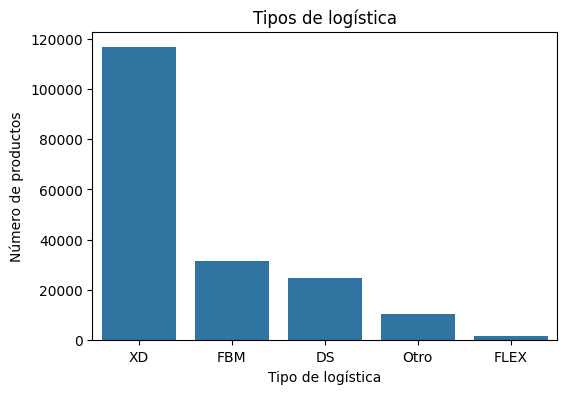

In [79]:
# ==============================
# 3. Logistic Type
# ==============================
plt.figure(figsize=(6,4))
sns.countplot(x='logistic_type', data=df, order=df['logistic_type'].value_counts().index)
plt.title("Tipos de logística")
plt.xlabel("Tipo de logística")
plt.ylabel("Número de productos")
plt.show()

Análisis:
- El tipo de logística XD concentra la mayor parte de los productos publicados.
- Otros tipos como FBM y DS aparecen en un segundo nivel de participación.
- FLEX y otros representan la menor proporción del total.

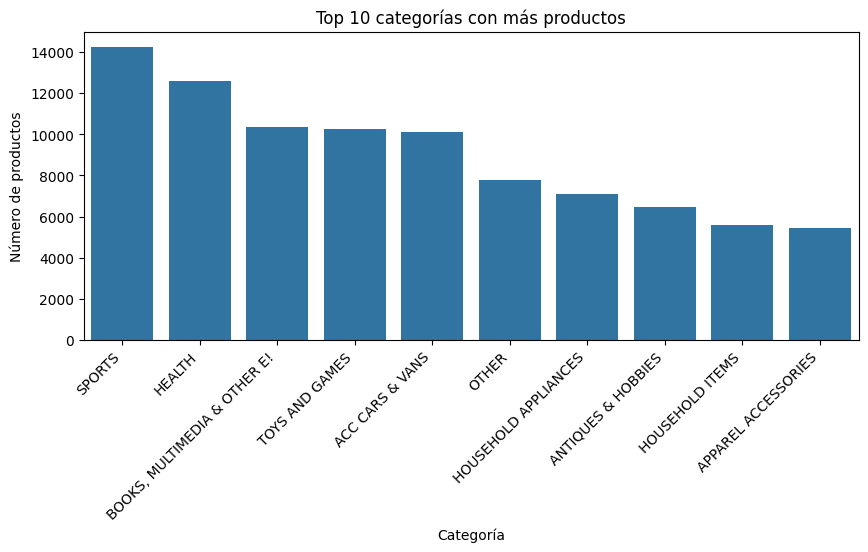

In [80]:

# ==============================
# 4. Categorías principales
# ==============================
top_cats = df['categoria'].value_counts().head(10)

plt.figure(figsize=(10,4))
sns.barplot(x=top_cats.index, y=top_cats.values)
plt.title("Top 10 categorías con más productos")
plt.xlabel("Categoría")
plt.ylabel("Número de productos")
plt.xticks(rotation=45, ha="right")
plt.show()

Análisis:
- Las categorías con mayor cantidad de productos son Sports, seguida de Health.
- Otras categorías destacadas son Books, Multimedia & Other EI, Toys and Games y ACC Cars & Vans.
- Categorías como Household Items y Apparel Accessories tienen menor representación dentro del top 10.

Shape: (185250, 14)
tim_day               object
seller_nickname       object
titulo                object
seller_reputation     object
stock                  int64
logistic_type         object
condition             object
is_refurbished          bool
price                float64
regular_price        float64
categoria             object
url                   object
category_id           object
category_name         object
dtype: object

% de nulos por columna:
 regular_price        73.033198
seller_reputation     1.280432
price                 0.818354
titulo                0.000000
seller_nickname       0.000000
tim_day               0.000000
logistic_type         0.000000
stock                 0.000000
is_refurbished        0.000000
condition             0.000000
categoria             0.000000
url                   0.000000
category_id           0.000000
category_name         0.000000
dtype: float64

Columnas categoricas y numero de valores unicos:
 - tim_day: 1 unicos
 - seller_nick

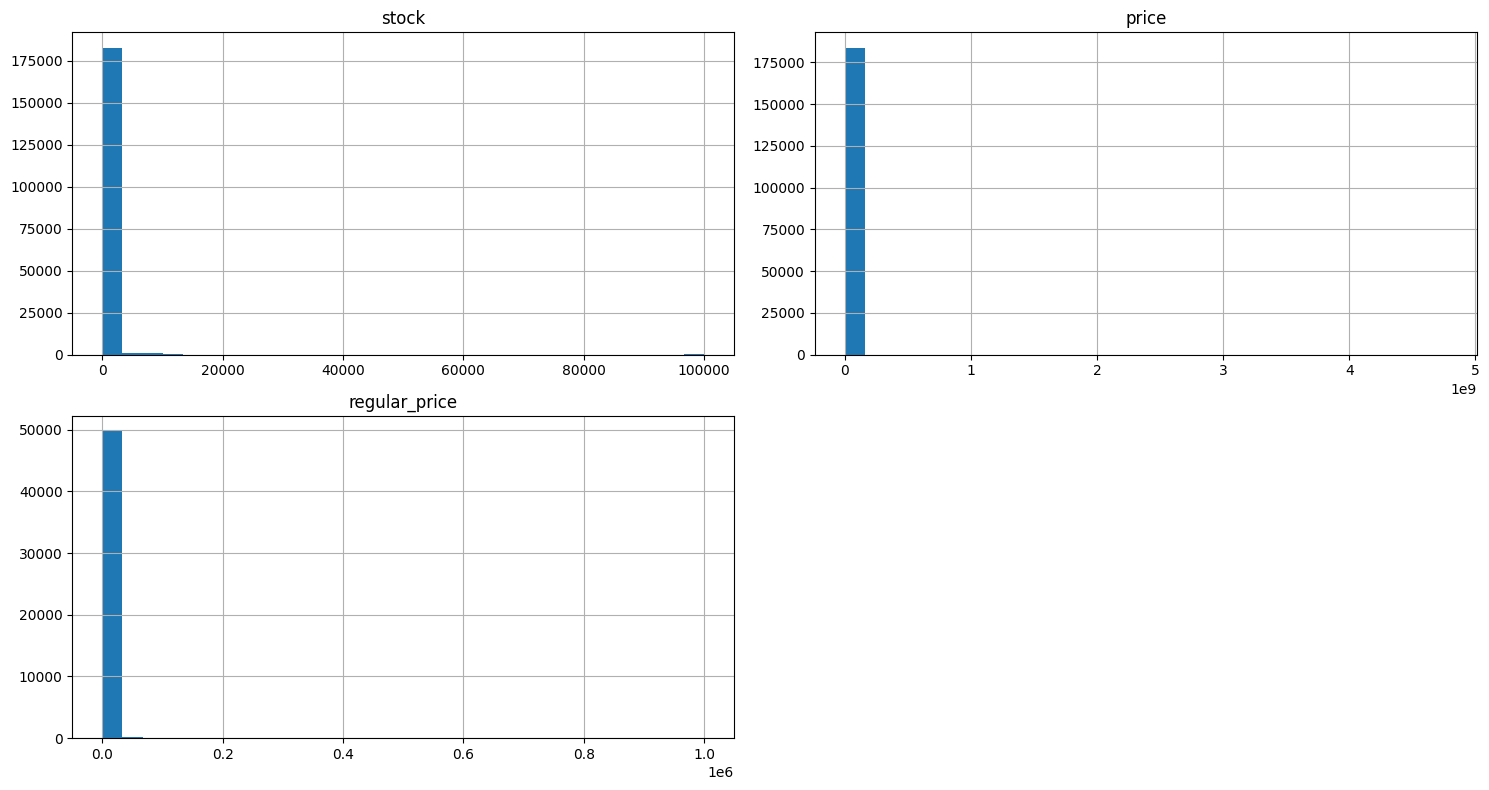

In [81]:
import pandas as pd
import numpy as np

# dataset cargado en df
print(f"Shape: {df.shape}")   # filas y columnas
print(df.dtypes)              # tipos de datos

# % de nulos por columna
nulls = df.isna().mean().sort_values(ascending=False) * 100
print("\n% de nulos por columna:\n", nulls)

# columnas categoricas y numero de valores unicos
cat_cols = df.select_dtypes(exclude=['number','bool']).columns.tolist()
print("\nColumnas categoricas y numero de valores unicos:")
for c in cat_cols:
    print(f" - {c}: {df[c].nunique()} unicos")

# columnas numericas y estadisticos basicos
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("\nColumnas numericas:", num_cols)
print(df[num_cols].describe().T)

# grafico de histogramas de las columnas numericas
import matplotlib.pyplot as plt
df[num_cols].hist(bins=30, figsize=(15,8))
plt.tight_layout()
plt.show()



In [82]:
import numpy as np

# hago una copia del df para no tocar el original
df_sellers = df.copy()

# flag de out-of-stock (cuando stock es 0 o nulo)
df_sellers["is_oos"] = (df_sellers["stock"].fillna(0) <= 0).astype(int)

# calculo el descuento relativo si hay precio regular valido
df_sellers["discount_rel"] = np.where(
    (df_sellers["regular_price"] > 0) & df_sellers["price"].notna(),
    ((df_sellers["regular_price"] - df_sellers["price"]) / df_sellers["regular_price"]).clip(-1,1),
    np.nan
)

# agrego por seller, sacando diferentes features
seller_features = df_sellers.groupby("seller_nickname").agg(
    n_items=("titulo","count"),                               # numero de items
    stock_total=("stock","sum"),                              # stock total
    pct_oos=("is_oos","mean"),                                # % out of stock
    price_mean=("price","mean"),                              # precio promedio
    price_median=("price","median"),                          # precio mediano
    disc_mean=("discount_rel","mean"),                        # promedio descuento
    disc_share=("discount_rel", lambda s: (s.notna() & (s>0)).mean()),  # % de items con descuento
    nuniq_cat=("category_id","nunique"),                      # numero de categorias unicas
    topcat_share=("category_id", lambda s: (s.value_counts(normalize=True).iloc[0] if s.notna().any() else np.nan)) # share de la categoria principal
).reset_index()

print("Shape seller_features:", seller_features.shape)
seller_features.head()



Shape seller_features: (46586, 10)


,seller_nickname,n_items,stock_total,pct_oos,price_mean,price_median,disc_mean,disc_share,nuniq_cat,topcat_share
0,000631669c,1,10,0.0,799.0,799.0,NaN,0.0,1,1.0
1,0007153bca,2,55,0.0,399.0,399.0,NaN,0.0,1,1.0
2,000bee3c3b,2,0,1.0,382.5,382.5,NaN,0.0,1,1.0
3,000df2bd02,1,5,0.0,1550.0,1550.0,NaN,0.0,1,1.0
4,000e27cea2,2,6,0.0,457.5,457.5,NaN,0.0,2,0.5


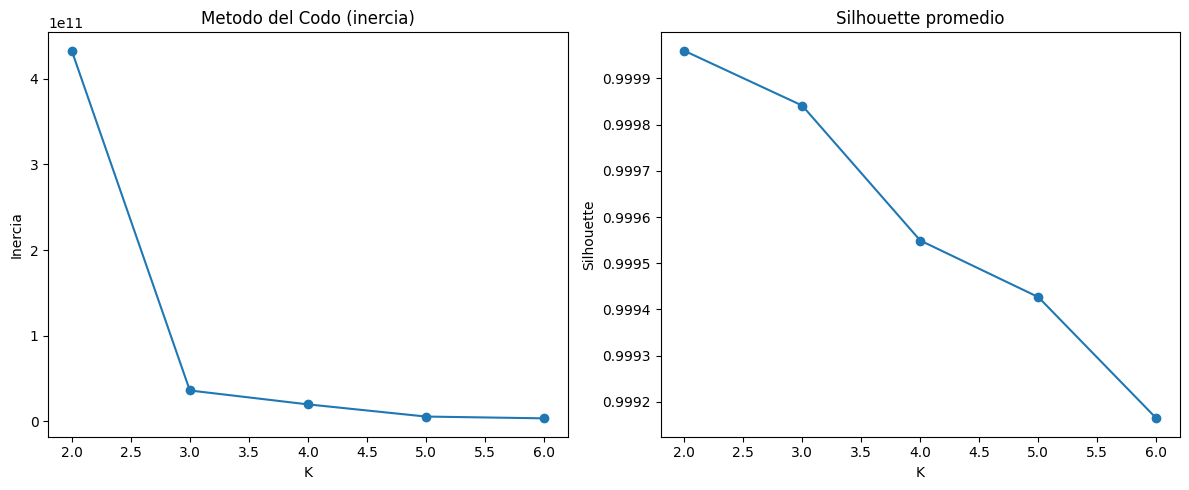

Mejor K segun silhouette: 2


In [83]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# selecciono solo columnas numericas (excluyo el id del seller)
num_cols = [c for c in seller_features.columns if c not in ["seller_nickname"]]
X = seller_features[num_cols].replace([np.inf,-np.inf], np.nan).fillna(0)  # limpio inf/nan por si acaso

# escalado robusto, no se vuelve loco con outliers
scaler = RobustScaler()
Xs = scaler.fit_transform(X)

# pruebo varios K para ver donde se estabiliza (codo) y cual da mejor silhouette
ks = [2,3,4,5,6]
elbows, sils = [], []

for k in ks:
    km = KMeans(n_clusters=k, n_init=30, random_state=42)  # n_init mas alto para estabilidad
    labels = km.fit_predict(Xs)
    elbows.append(km.inertia_)                              # inercia para el metodo del codo
    sils.append(silhouette_score(Xs, labels))               # silhouette promedio

# grafico codo y silhouette para comparar
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(ks, elbows, marker="o")
plt.title("Metodo del Codo (inercia)")
plt.xlabel("K"); plt.ylabel("Inercia")

plt.subplot(1,2,2)
plt.plot(ks, sils, marker="o")
plt.title("Silhouette promedio")
plt.xlabel("K"); plt.ylabel("Silhouette")

plt.tight_layout()
plt.show()

# me quedo con el K que maximiza silhouette (simple y claro)
best_k = ks[int(np.argmax(sils))]
print("Mejor K segun silhouette:", best_k)


## KMeans: búsqueda de K y primer modelo

Normalizo con **RobustScaler** para no sufrir tanto por outliers.  
Pruebo varios **K** (2–6) y miro **codo** (inercia) + **silhouette**.  
Con este primer set, **K=2** sale razonable (buena separación sin sobre-segmentar).  
Genero el modelo con K=2 y resumo medianas por cluster para interpretar perfiles.

### 🔹 Selección del número de clusters (K)

Para decidir cuántos clusters usar en KMeans probé con dos métodos muy usados:

- **Método del Codo** → mide la inercia (qué tan compactos quedan los grupos).  
  A medida que aumento K, la inercia siempre baja, pero llega un punto donde la mejora deja de ser significativa. Ese punto de quiebre es el “codo”.

- **Coeficiente de Silhouette** → evalúa la calidad de los clusters combinando cohesión (qué tan juntos están los puntos de un mismo cluster) y separación (qué tan lejos quedan de otros clusters).  
  El valor va de -1 a 1 (mientras más cerca de 1, mejor definidos los grupos).

Uso esta dupla porque es la forma más estándar y defendible para justificar el número de clusters en un análisis exploratorio.  
Otros métodos como Gap Statistic o Davies–Bouldin existen, pero son más costosos o menos interpretables para este caso.


In [84]:
# entreno el modelo final de kmeans con el K elegido
final_k = 2
km_final = KMeans(n_clusters=final_k, n_init=50, random_state=42)
seller_features["cluster"] = km_final.fit_predict(Xs)

# saco un resumen de los clusters usando la mediana de cada feature
cluster_summary = seller_features.groupby("cluster")[num_cols].median().round(2)
print("Resumen por cluster (medianas):")
print(cluster_summary)

# miro cuantos sellers cayeron en cada cluster
print("\nCantidad de sellers por cluster:")
print(seller_features["cluster"].value_counts())



Resumen por cluster (medianas):
         n_items  stock_total  pct_oos    price_mean  price_median  disc_mean  \
cluster                                                                         
0            1.0         14.0      0.0  6.631300e+02  5.990000e+02       0.15   
1            1.0          1.0      0.0  4.772354e+09  4.772354e+09        NaN   

         disc_share  nuniq_cat  topcat_share  
cluster                                       
0               0.0        1.0           1.0  
1               0.0        1.0           1.0  

Cantidad de sellers por cluster:
cluster
0    46585
1        1
Name: count, dtype: int64


Umbral precio (p99): 60062.99999999974
Umbral stock (p99): 19509.350000000013
Sellers antes: 46586  | después: 45409


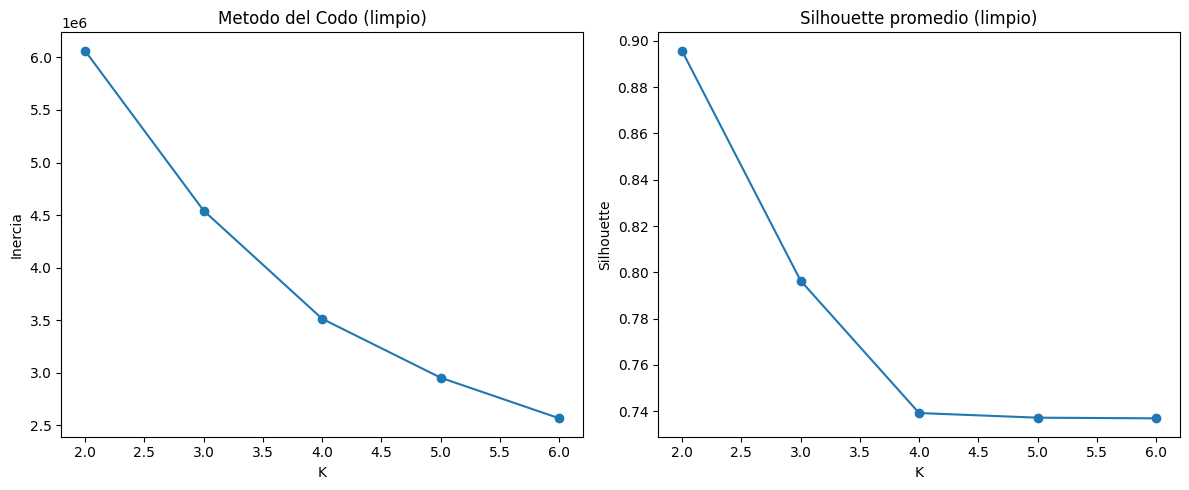

Mejor K despues de limpiar: 2


In [85]:
# limpieza outla y nuevo clusters

# hago una copia de los features originales para no dañar la version anterior
seller_features_clean = seller_features.copy()

# defino los umbrales en p99 para precio y stock
price_thr = seller_features_clean["price_mean"].quantile(0.99)
stock_thr = seller_features_clean["stock_total"].quantile(0.99)

print("Umbral precio (p99):", price_thr)
print("Umbral stock (p99):", stock_thr)

# filtro los sellers que estan dentro de los limites de precio y stock
mask = (seller_features_clean["price_mean"] <= price_thr) & \
       (seller_features_clean["stock_total"] <= stock_thr)

seller_features_clean = seller_features_clean[mask].reset_index(drop=True)
print("Sellers antes:", seller_features.shape[0], " | después:", seller_features_clean.shape[0])

# re-escalo y vuelvo a correr clustering con varios K
X_clean = seller_features_clean[num_cols].replace([np.inf,-np.inf], np.nan).fillna(0)
Xs_clean = scaler.fit_transform(X_clean)

ks = [2,3,4,5,6]
elbows, sils = [], []

for k in ks:
    km = KMeans(n_clusters=k, n_init=30, random_state=42)
    labels = km.fit_predict(Xs_clean)
    elbows.append(km.inertia_)
    sils.append(silhouette_score(Xs_clean, labels))

# grafico codo y silhouette pero ya con los datos limpios
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(ks, elbows, marker="o")
plt.title("Metodo del Codo (limpio)")
plt.xlabel("K"); plt.ylabel("Inercia")

plt.subplot(1,2,2)
plt.plot(ks, sils, marker="o")
plt.title("Silhouette promedio (limpio)")
plt.xlabel("K"); plt.ylabel("Silhouette")

plt.tight_layout()
plt.show()

# elijo el K con mejor silhouette usando el dataset limpio
best_k_clean = ks[int(np.argmax(sils))]
print("Mejor K despues de limpiar:", best_k_clean)


## Limpieza de outliers y re-clustering

Vi valores extremos en `price_mean` y `stock_total`.  
Hago un recorte en **percentil 99** (p99) para limpiar “colas locas”.  
Re-escalo y vuelvo a probar K (2–6) con codo + silhouette.  
Esto suele estabilizar la separación y hacer más “justo” el clustering para la mayoría.

In [86]:
# entreno el modelo final ya con los datos limpios y K=2
final_k_clean = 2
km_final_clean = KMeans(n_clusters=final_k_clean, n_init=50, random_state=42)
seller_features_clean["cluster"] = km_final_clean.fit_predict(Xs_clean)

# saco resumen de los clusters usando las medianas de cada feature
cluster_summary_clean = seller_features_clean.groupby("cluster")[num_cols].median().round(2)
print("Resumen por cluster (medianas, limpio):")
print(cluster_summary_clean)

# cuento cuantos sellers quedaron en cada cluster
print("\nCantidad de sellers por cluster:")
print(seller_features_clean["cluster"].value_counts())



Resumen por cluster (medianas, limpio):
         n_items  stock_total  pct_oos  price_mean  price_median  disc_mean  \
cluster                                                                       
0            1.0         13.0      0.0      664.05        599.00       0.16   
1            6.0       8996.5      0.0      523.04        452.34       0.09   

         disc_share  nuniq_cat  topcat_share  
cluster                                       
0               0.0        1.0          1.00  
1               0.2        2.0          0.67  

Cantidad de sellers por cluster:
cluster
0    44433
1      976
Name: count, dtype: int64


## Modelo final con datos limpios (K=2)

Entreno KMeans con **K=2** ya sobre los datos limpios.  
Hago el resumen de medianas por cluster y la cuenta de sellers por grupo.  
Esto me da una segmentación compacta y fácil de explicar (micro vs. medianos).

In [87]:
# entreno el modelo con K=3 para ver si aparece una segmentacion mas fina
km_k3 = KMeans(n_clusters=3, n_init=50, random_state=42)
seller_features_clean["cluster_k3"] = km_k3.fit_predict(Xs_clean)

# hago un resumen de los clusters con las medianas de cada feature
cluster_summary_k3 = seller_features_clean.groupby("cluster_k3")[num_cols].median().round(2)
print("Resumen por cluster (medianas, K=3, limpio):")
print(cluster_summary_k3)

# reviso cuantos sellers quedaron en cada cluster
print("\nCantidad de sellers por cluster (K=3):")
print(seller_features_clean["cluster_k3"].value_counts())



Resumen por cluster (medianas, K=3, limpio):
            n_items  stock_total  pct_oos  price_mean  price_median  \
cluster_k3                                                            
0               1.0         11.0      0.0      672.40        600.00   
1               6.0      10844.0      0.0      503.63        448.94   
2               6.0       3550.0      0.0      542.85        446.23   

            disc_mean  disc_share  nuniq_cat  topcat_share  
cluster_k3                                                  
0                0.17        0.00        1.0          1.00  
1                0.09        0.17        2.0          0.67  
2                0.10        0.38        2.0          0.65  

Cantidad de sellers por cluster (K=3):
cluster_k3
0    43429
2     1385
1      595
Name: count, dtype: int64


## Entrenamiento con K=3 (comparación)

También pruebo **K=3** para ver si aparece una segmentación más fina.  
Con K=3, los medianos se dividen en **dos subperfiles** (por ejemplo, uno con más descuentos y otro con mayor diversidad/stock).  
Muestro medianas por cluster y cómo queda el reparto de sellers.  
Esta vista es útil cuando negocio quiere acciones más específicas por subgrupo.

C:\Users\juand\AppData\Local\Temp\ipykernel_19668\3774373236.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="cluster_k3", data=df_clusters, palette="Set2")


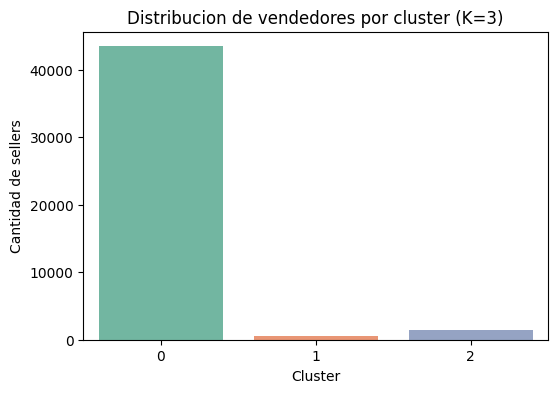

In [93]:
# copio el dataset con clusters para graficar
df_clusters = seller_features_clean.copy()

# Distribución de vendedores por cluster ---
# --- Bloque 1: Distribución de vendedores por cluster ---
plt.figure(figsize=(6,4))
sns.countplot(x="cluster_k3", data=df_clusters, palette="Set2")
plt.title("Distribucion de vendedores por cluster (K=3)")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de sellers")
plt.show()

Análisis:
- El Cluster 0 concentra la gran mayoría de vendedores.
- El Cluster 1 agrupa a una cantidad pequeña en comparación.
- El Cluster 2 incluye a un grupo intermedio de vendedores, con un peso menor que el Cluster 0.

C:\Users\juand\AppData\Local\Temp\ipykernel_19668\3229486993.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cluster_k3", y="n_items", data=df_clusters, palette="Set2")


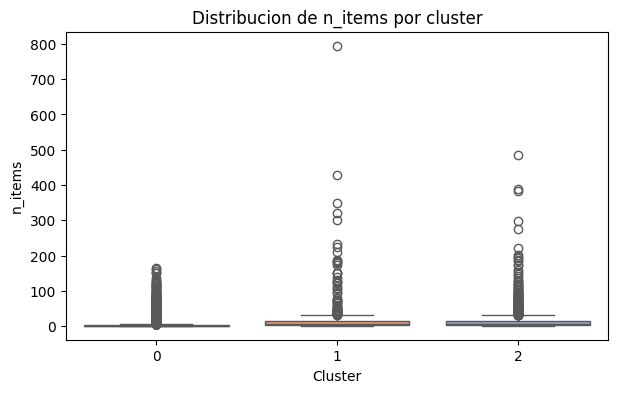

In [94]:
# n_items por cluster ---
plt.figure(figsize=(7,4))
sns.boxplot(x="cluster_k3", y="n_items", data=df_clusters, palette="Set2")
plt.title("Distribucion de n_items por cluster")
plt.xlabel("Cluster"); plt.ylabel("n_items")
plt.show()

Análisis:
- Los tres clusters muestran una mayoría de vendedores con pocos ítems.
- El Cluster 1 presenta casos aislados con un número de ítems considerablemente más alto.
- El Cluster 2 también refleja algunos outliers, aunque menos pronunciados.

C:\Users\juand\AppData\Local\Temp\ipykernel_19668\2673959603.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cluster_k3", y="stock_total", data=df_clusters, palette="Set2")


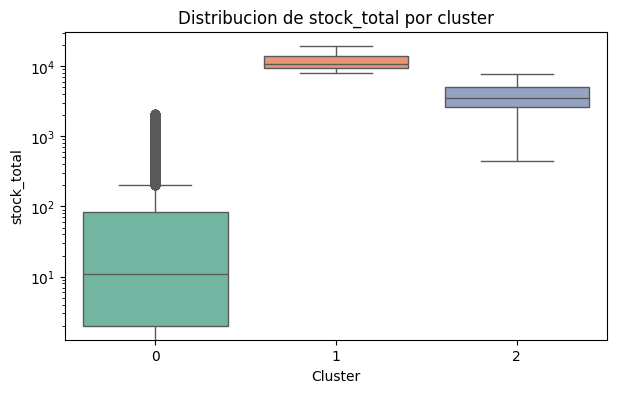

In [95]:
# stock_total por cluster ---
plt.figure(figsize=(7,4))
sns.boxplot(x="cluster_k3", y="stock_total", data=df_clusters, palette="Set2")
plt.title("Distribucion de stock_total por cluster")
plt.xlabel("Cluster"); plt.ylabel("stock_total")
plt.yscale("log")
plt.show()

Análisis:
- El Cluster 0 concentra vendedores con niveles de stock bajos.
- El Cluster 1 reúne a vendedores con los niveles de stock más altos.
- El Cluster 2 se ubica en un punto intermedio, con stock superior al Cluster 0 pero inferior al Cluster 1.

C:\Users\juand\AppData\Local\Temp\ipykernel_19668\2682361199.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cluster_k3", y="price_mean", data=df_clusters, palette="Set2")


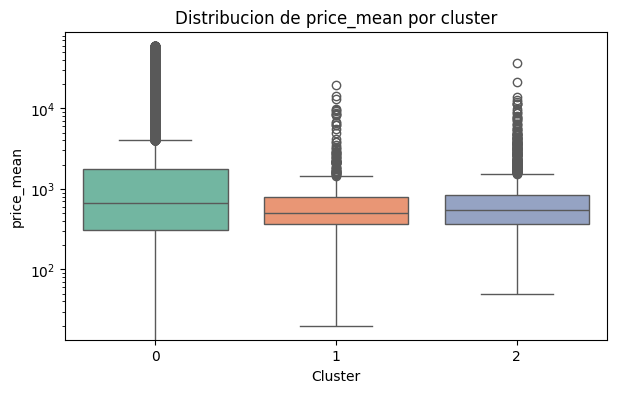

In [96]:
# price_mean por cluster ---
plt.figure(figsize=(7,4))
sns.boxplot(x="cluster_k3", y="price_mean", data=df_clusters, palette="Set2")
plt.title("Distribucion de price_mean por cluster")
plt.xlabel("Cluster"); plt.ylabel("price_mean")
plt.yscale("log")
plt.show()

Análisis:
- El Cluster 0 agrupa a los vendedores con precios promedio más altos.
- Los Clusters 1 y 2 muestran precios promedio más bajos en comparación.
- Se observan outliers en todos los clusters con precios especialmente altos.

C:\Users\juand\AppData\Local\Temp\ipykernel_19668\3234294377.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cluster_k3", y="disc_share", data=df_clusters, palette="Set2")


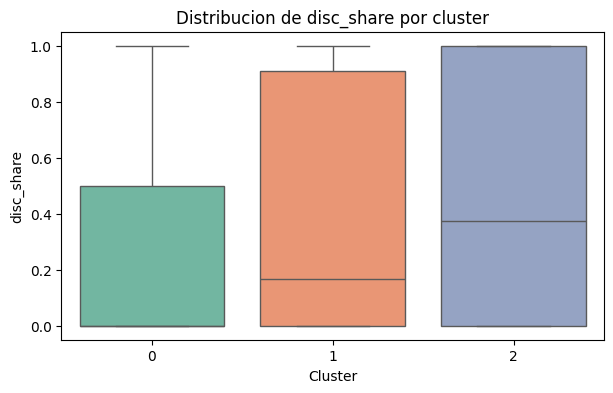

In [97]:
#  disc_share por cluster ---
plt.figure(figsize=(7,4))
sns.boxplot(x="cluster_k3", y="disc_share", data=df_clusters, palette="Set2")
plt.title("Distribucion de disc_share por cluster")
plt.xlabel("Cluster"); plt.ylabel("disc_share")
plt.show()

Análisis:
- El Cluster 0 mantiene valores intermedios de participación en descuentos.
- El Cluster 1 presenta en general valores bajos, aunque con algunos casos de mayor participación.
- El Cluster 2 se distingue por una mediana más alta en disc_share, reflejando mayor proporción de productos con descuentos.

C:\Users\juand\AppData\Local\Temp\ipykernel_19668\324179375.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cluster_k3", y="nuniq_cat", data=df_clusters, palette="Set2")


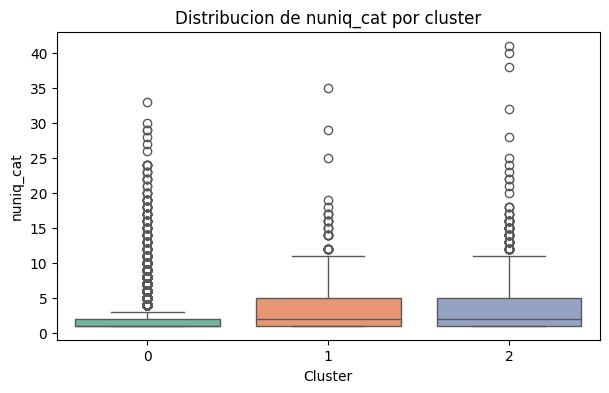

In [98]:
#  nuniq_cat por cluster ---
plt.figure(figsize=(7,4))
sns.boxplot(x="cluster_k3", y="nuniq_cat", data=df_clusters, palette="Set2")
plt.title("Distribucion de nuniq_cat por cluster")
plt.xlabel("Cluster"); plt.ylabel("nuniq_cat")
plt.show()

Análisis:
- El Cluster 0 concentra la mayoría de valores bajos en nuniq_cat.
- Los Clusters 1 y 2 muestran distribuciones más amplias, con presencia de outliers en valores altos.
- Esto indica que los vendedores de Clusters 1 y 2 manejan mayor diversidad de categorías de producto.

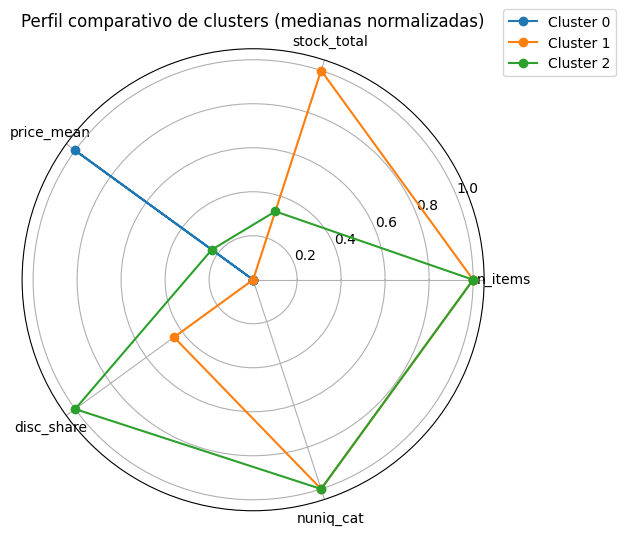

In [99]:
# Radar de medianas normalizadas ---
from sklearn.preprocessing import MinMaxScaler
import numpy as np

features_to_plot = ["n_items","stock_total","price_mean","disc_share","nuniq_cat"]

summary = df_clusters.groupby("cluster_k3")[features_to_plot].median()
scaler = MinMaxScaler()
summary_scaled = pd.DataFrame(
    scaler.fit_transform(summary),
    columns=features_to_plot,
    index=summary.index
)

labels = features_to_plot
num_vars = len(labels)
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(6,6))
for i, row in summary_scaled.iterrows():
    values = row.tolist(); values += values[:1]
    plt.polar(angles, values, marker="o", label=f"Cluster {i}")
plt.xticks(angles[:-1], labels)
plt.title("Perfil comparativo de clusters (medianas normalizadas)")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.show()

Análisis:
- El Cluster 0 se caracteriza por un nivel alto de precio promedio en comparación con los demás.
- El Cluster 1 sobresale en stock_total e items, mostrando valores más elevados en estas variables.
- El Cluster 2 presenta valores altos en disc_share, nuniq_cat e items, diferenciándose por una mayor diversidad de categorías y participación en descuentos.

## ¿Por qué usé 3 clusters si al inicio probé 2?

- **Lo que vi con K=2**: buena separación general y clusters grandes/estables. Sirve como “corte grueso” (micro-sellers vs. medianos).
- **Qué agregó K=3**: partió a los “medianos” en **dos subperfiles**:
  - Uno con **más señal de descuentos** (`disc_share` más alto).
  - Otro con **diversidad distinta** (`nuniq_cat`/`topcat_share`) o stock característico.
- **Métrica vs. negocio**:
  - A veces **silhouette** favorece K=2 por compacidad, pero **K=3** ofrece **segmentación accionable** (dos estrategias diferentes para medianos).
  - Comparé medianas y tamaños de cluster: no quedaron clusters diminutos sin sentido, y las diferencias de variables **sí son interpretables**.
- **Decisión práctica**:
  - Reporto **ambas** lecturas:
    - **K=2** como versión simple/operativa (rápida para accionar a gran escala).
    - **K=3** cuando se quieren **tácticas diferenciadas** dentro de los medianos (promos/descuentos vs. mix de catálogo/stock).


In [100]:
km_k3.cluster_centers_

array([[ 1.10417242e+00,  1.09689813e+00,  3.15887945e-02,
         1.19317367e+00,  1.31429221e+00,  1.28762298e+00,
         4.82243885e-01,  5.75020724e-01, -5.01451889e-01],
       [ 8.75798319e+00,  1.20433699e+02,  1.29452779e-02,
         1.80996651e-01,  8.00146852e-02,  1.55782470e+00,
         8.04118310e-01,  2.87899160e+00, -1.37103589e+00],
       [ 7.17857143e+00,  3.99064037e+01,  1.13210068e-02,
         2.10196149e-01,  8.19321863e-02,  2.03580391e+00,
         9.01249097e-01,  3.08441558e+00, -1.42061574e+00]])

In [103]:
import os

# creo la carpeta de outputs/clusters si no existe
os.makedirs("../outputs/clusters", exist_ok=True)

# aca ya tengo el df seller_features_clean con la col cluster_k3
# (si no esta en memoria, hay que correr de nuevo las celdas donde se armó km_k3)
labels_path = "../outputs/clusters/seller_clusters_k3.csv"

# guardo el seller junto con su cluster en un csv
seller_features_clean[["seller_nickname","cluster_k3"]].to_csv(labels_path, index=False, encoding="utf-8")

print("Etiquetas (seller → cluster_k3) guardadas en:", labels_path)
print(seller_features_clean[["seller_nickname","cluster_k3"]].head())

Etiquetas (seller → cluster_k3) guardadas en: ../outputs/clusters/seller_clusters_k3.csv
  seller_nickname  cluster_k3
0      000631669c           0
1      0007153bca           0
2      000bee3c3b           0
3      000df2bd02           0
4      000e27cea2           0


## Export de etiquetas (seller → cluster_k3)

Guardo las etiquetas de cluster por seller en `../outputs/clusters/seller_clusters_k3.csv`.  
Esto me sirve como **ground-truth** para entrenar un **clasificador supervisado** con embeddings (módulo GenAI).

In [104]:
# 2.1 cargo el dataset original y las etiquetas de clusters
import pandas as pd
import os

labels = pd.read_csv("../outputs/clusters/seller_clusters_k3.csv")

print("Shape productos:", df.shape)
print("Shape etiquetas:", labels.shape)

# 2.2 armo un texto por cada seller, concatenando titulos de sus productos
# limito a 100 titulos por seller para no llenar memoria
MAX_TITULOS = 100

seller_texts = (
    df.groupby("seller_nickname")["titulo"]
      .apply(lambda x: " ".join(x.astype(str).head(MAX_TITULOS)))
      .reset_index()
      .rename(columns={"titulo":"catalog_text"})
)

# 2.3 uno ese texto con los clusters que ya calculé antes
seller_data = seller_texts.merge(labels, on="seller_nickname", how="inner")
print("Shape final:", seller_data.shape)
seller_data.head(3)


Shape productos: (185250, 14)
Shape etiquetas: (45409, 2)
Shape final: (45409, 3)


,seller_nickname,catalog_text,cluster_k3
0,000631669c,Hedonnica J Case,0
1,0007153bca,Loción De Amor Perfume Esotérica Quita Calzón ...,0
2,000bee3c3b,Habitos Atomicos Td Spider Man Enemigos Intimos,0


In [105]:
# 3.1 — Embeddings LLM por seller (catalog_text → vector)

# imports basicos
import sys, subprocess, importlib

def ensure(pkg):
    try:
        importlib.import_module(pkg)
    except ImportError:
        print(f"Instalando {pkg} ...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

ensure("sentence_transformers")

# cargo el modelo de sentence transformers
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
from pathlib import Path

model_name = "paraphrase-multilingual-MiniLM-L12-v2"  # modelo multilingue bueno para español
model = SentenceTransformer(model_name, device="cpu")  

# saco los textos de cada seller (col catalog_text que arme antes)
texts = seller_data["catalog_text"].fillna("").astype(str).tolist()

# genero los embeddings en batch
embeddings = model.encode(
    texts,
    batch_size=64,
    show_progress_bar=True,
    convert_to_numpy=True,
    normalize_embeddings=True  # normaliza para que el coseno se pueda usar directo
)

embeddings.shape  # (num_sellers, dim)


c:\Users\juand\Documents\data_challenge\meli_challenge\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Batches: 100%|██████████| 710/710 [15:56<00:00,  1.35s/it]


(45409, 384)

## Embeddings LLM por seller

Uso `paraphrase-multilingual-MiniLM-L12-v2` (multilingüe, buen rendimiento en ES).  
Genero un vector por seller (norma L2=1 para que coseno sea dot).  
Queda una matriz `(n_sellers, 384)`. Esto es la entrada del clasificador.

In [106]:
embeddings [0].shape

(384,)

In [107]:
# 4.1 — Clasificador supervisado con embeddings de sellers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# X son los embeddings que calcule antes y y son los clusters k3 de cada seller
X = embeddings
y = seller_data["cluster_k3"].values

# hago el split train/test con 20% para test, estratificando por cluster
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# entreno un logistic regression, con regularizacion L2 y hasta 200 iteraciones
clf = LogisticRegression(max_iter=200, n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)

# predigo en test
y_pred = clf.predict(X_test)

# imprimo el reporte de clasificacion y la matriz de confusion
print("Reporte de clasificacion:\n", classification_report(y_test, y_pred))
print("\nMatriz de confusion:\n", confusion_matrix(y_test, y_pred))

Reporte de clasificacion:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      8686
           1       0.00      0.00      0.00       119
           2       1.00      0.01      0.01       277

    accuracy                           0.96      9082
   macro avg       0.65      0.34      0.33      9082
weighted avg       0.95      0.96      0.94      9082


Matriz de confusion:
 [[8686    0    0]
 [ 119    0    0]
 [ 275    0    2]]


c:\Users\juand\Documents\data_challenge\meli_challenge\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\juand\Documents\data_challenge\meli_challenge\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\juand\Documents\data_challenge\meli_challenge\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavio

## Clasificador (baseline)

Entreno **Logistic Regression** usando los embeddings como features y `cluster_k3` como target.  
- **Sin balancear**: accuracy alto (domina cluster 0), pero **no** reconoce bien los minoritarios.
- Esto es típico cuando una clase es **muy mayoritaria** (recall casi cero en 1 y 2).

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# re-entreno logistic regression pero ahora con class_weight="balanced"
# esto le da mas peso a los clusters minoritarios
clf_bal = LogisticRegression(
    max_iter=200,
    n_jobs=-1,
    random_state=42,
    class_weight="balanced"
)
clf_bal.fit(X_train, y_train)

# predigo en el test set
y_pred_bal = clf_bal.predict(X_test)

# imprimo resultados del modelo balanceado
print("Reporte de clasificacion (balanced):\n", classification_report(y_test, y_pred_bal))
print("\nMatriz de confusion (balanced):\n", confusion_matrix(y_test, y_pred_bal))



Reporte de clasificacion (balanced):
               precision    recall  f1-score   support

           0       0.99      0.73      0.84      8686
           1       0.03      0.32      0.06       119
           2       0.09      0.48      0.15       277

    accuracy                           0.71      9082
   macro avg       0.37      0.51      0.35      9082
weighted avg       0.95      0.71      0.81      9082


Matriz de confusion (balanced):
 [[6319 1011 1356]
 [  29   38   52]
 [  59   85  133]]


## Clasificador balanceado

Re-entreno con `class_weight="balanced"` para darle más peso a los clusters chicos.  
Resultado:
- Baja el **accuracy global**, pero **sube el recall** en 1 y 2 (que es lo que me interesa para no ignorarlos).
- Trade-off sano: prefiero ver a 1 y 2 aparecer (aunque venga con algo de ruido) a que queden “absorbidos” por el 0.

In [109]:
# ejemplo de prediccion usando el modelo balanceado
i = 200  # tomo un indice cualquiera, se puede cambiar
seller = seller_data.iloc[i]

# saco el embedding de ese seller y lo paso al clasificador
X_seller = embeddings[i].reshape(1, -1)
pred = clf_bal.predict(X_seller)[0]
probs = clf_bal.predict_proba(X_seller)[0]

# imprimo info del seller para comparar real vs predicho
print("Seller:", seller["seller_nickname"])
print("Texto catalogo (truncado):", seller["catalog_text"][:120], "...")
print("Cluster real:", seller["cluster_k3"])
print("Cluster predicho:", pred)
print("Probabilidades:", probs)



Seller: 0130bc2def
Texto catalogo (truncado): Tenis Plataforma Alta Chunky Bota Suela Gruesa Moda Mujer ...
Cluster real: 0
Cluster predicho: 0
Probabilidades: [0.55082471 0.10961897 0.33955632]


## Ejemplo de predicción

Muestro un seller real:  
- su `catalog_text` (recortado),  
- el **cluster real vs. predicho**  
- y las **probabilidades**.

Sirve para explicar cómo usar esto en **onboarding**: llega un seller nuevo, genero su embedding y el modelo lo asigna a un cluster con % de confianza → ya puedo sugerir estrategia (promo, logística, etc).


In [110]:
# === Tabla de desempeño por cluster + ejemplos de sellers ===
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# reproduzco el split para recuperar los indices del test (asi se alinean con seller_data)
idx_all = np.arange(len(seller_data))
X = embeddings
y = seller_data["cluster_k3"].values

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, idx_all, test_size=0.2, random_state=42, stratify=y
)

# saco el reporte de sklearn en formato dict para acceder a cada clase
report = classification_report(y_test, clf_bal.predict(X_test), output_dict=True)

def get_metrics_for_label(lbl):
    d = report[str(lbl)]
    return round(d["precision"], 2), round(d["recall"], 2), round(d["f1-score"], 2), int(d["support"])

# ahora busco un ejemplo representativo de cada cluster
# elijo el seller con mayor confianza entre los que fueron predichos en ese cluster
probs_test = clf_bal.predict_proba(X_test)
pred_test  = probs_test.argmax(axis=1)

rows = []
descripciones = {
    0: "Micro-sellers especializados, pocos items y bajo stock",
    1: "Vendedores medianos, algo diversificados",
    2: "Vendedores medianos con estrategia de descuentos",
}

for c in [0, 1, 2]:
    # meto las metricas del reporte
    prec, rec, f1, supp = get_metrics_for_label(c)

    # me quedo con el seller con mayor probabilidad dentro de los predichos en cluster c
    mask = pred_test == c
    if mask.any():
        i_local = np.argmax(probs_test[mask, c])                # indice dentro del subconjunto
        test_positions = np.flatnonzero(mask)
        pos = test_positions[i_local]
        global_idx = idx_test[pos]                              # indice original en seller_data
        seller_row = seller_data.iloc[global_idx]
        ejemplo_texto = (seller_row["catalog_text"][:120] + "…") if len(seller_row["catalog_text"]) > 120 else seller_row["catalog_text"]
        conf = float(probs_test[pos, c])
        pred_str = f"Predicho cluster {c} con {conf:.0%} confianza"
    else:
        # si no hubo predicciones de ese cluster
        seller_row = {"seller_nickname": "—", "catalog_text": "—"}
        ejemplo_texto = "—"
        pred_str = "Sin predicciones para este cluster"

    rows.append({
        "Cluster": c,
        "Descripción del grupo": descripciones.get(c, ""),
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "Soporte (test)": supp,
        "Seller ejemplo": seller_row["seller_nickname"] if isinstance(seller_row, pd.Series) else "—",
        "Catálogo (resumen)": ejemplo_texto,
        "Predicción del modelo": pred_str,
    })

# armo la tabla final
tabla = pd.DataFrame(rows, columns=[
    "Cluster", "Descripción del grupo", "Precision", "Recall", "F1-score",
    "Soporte (test)", "Seller ejemplo", "Catálogo (resumen)", "Predicción del modelo"
])

# guardo la tabla en outputs/reports
from pathlib import Path
out_dir = Path("../outputs/reports")
out_dir.mkdir(parents=True, exist_ok=True)
out_csv = out_dir / "tabla_desempeno_clusters.csv"
tabla.to_csv(out_csv, index=False, encoding="utf-8")

print("Guardado:", out_csv)
tabla

Guardado: ..\outputs\reports\tabla_desempeno_clusters.csv


,Cluster,Descripción del grupo,Precision,Recall,F1-score,Soporte (test),Seller ejemplo,Catálogo (resumen),Predicción del modelo
0,0,"Micro-sellers especializados, pocos items y ba...",0.99,0.73,0.84,8686,eeb1d0054e,Computadora Astra,Predicho cluster 0 con 100% confianza
1,1,"Vendedores medianos, algo diversificados",0.03,0.32,0.06,119,550227cda9,Bolsita The Bellies Para Niñas En Forma De Cor...,Predicho cluster 1 con 88% confianza
2,2,Vendedores medianos con estrategia de descuentos,0.09,0.48,0.15,277,e9d162d825,Plafon Led Luz Fria Cuadrado Empotrado Delgado...,Predicho cluster 2 con 87% confianza


## Tabla de desempeño por cluster (con ejemplos)

Armo una tabla con:
- **Precision / Recall / F1** por cluster (del modelo balanceado),
- un **seller ejemplo** por cluster (el más “confiado”),
- snippet del catálogo y frase de predicción (“Predicho cluster X con Y% de confianza”).

Esta tabla es súper presentable y deja claro qué tan bien cubro cada grupo y cómo luce un caso real.


## Cierre

- Con KMeans (K=2) tengo un **corte simple y sólido**. Con **K=3** sumo una capa extra de acción (separo “medianos” en dos sub-perfiles interpretables).
- Con embeddings de LLM + clasificador balanceado, **ya puedo asignar** sellers nuevos a los clusters predefinidos (onboarding/scoring).
- Todos los artefactos quedan en `outputs/` (clusters, embeddings, reportes) para reproducir métricas y demos.


### Cluster 0 – Vendedores de precios altos y baja diversidad

- Es el cluster más numeroso en términos de cantidad de vendedores.
- Sus productos presentan **precios promedio más altos** en comparación con los demás clusters.
- Manejan **stock reducido**, con inventarios más limitados.
- Se concentran en **pocas categorías**, lo que indica menor diversificación de portafolio.
- Su participación en descuentos es **intermedia**, no destacan ni por ausencia ni por alta intensidad de promociones.

### Cluster 1 – Vendedores de gran volumen e inventario
- Agrupa un número reducido de vendedores, pero con un **stock total muy alto** y **más ítems publicados**.
- Es el segmento que concentra a los vendedores con **mayores inventarios**, lo que los convierte en actores relevantes en la oferta de la plataforma.
- Sus precios promedio son relativamente más bajos que los del Cluster 0, lo que les da un perfil **competitivo en precio**.
- Muestran baja participación en descuentos, lo que sugiere que su fortaleza está en el **volumen y variedad de inventario** más que en promociones.

### Cluster 2 – Vendedores diversificados y orientados a descuentos
- Se caracteriza por una **alta diversidad de categorías (nuniq_cat)** en comparación con los otros clusters.
- Presenta la **mayor participación en descuentos (disc_share)**, lo que indica una estrategia clara de apalancarse en promociones.
- Sus precios promedio son más bajos, pero mantienen un nivel de stock intermedio.
- Aunque no son tan voluminosos como los del Cluster 1, logran destacarse por la **combinación de variedad y descuentos**, lo que los hace atractivos en segmentos sensibles a precio.

### Conclusiones Generales

- El mercado presenta una **concentración de vendedores en reputación alta (green_platinum)**, lo que refleja confianza y experiencia en la mayoría de las transacciones.
- Los productos son principalmente **nuevos**, y la logística está dominada por el esquema **XD**, con menor representación de otros métodos.
- La estructura de clusters muestra que los vendedores no son homogéneos: 
   - algunos apuestan por **precio premium** (Cluster 0), 
   - otros por **gran volumen** (Cluster 1), 
   - y un tercer grupo por **descuentos y diversificación** (Cluster 2).
- Esto evidencia que la estrategia de cada cluster es distinta, lo que permite pensar en **acciones segmentadas** según el tipo de vendedor.

### Conclusión y resolución para el team comercial

Este análisis tuvo como objetivo entender mejor a los vendedores de la plataforma a partir de información de precios, stock, reputación, categorías y descuentos.  
A través de un proceso de exploración de datos y segmentación (clustering), identificamos **tres grandes grupos de vendedores**, cada uno con comportamientos distintos:

- **Cluster 0 – Vendedores de precios altos y baja diversidad**  
  Representan la mayoría, pero con inventarios más pequeños y precios promedio más elevados. Son menos diversificados y mantienen una participación intermedia en promociones.

- **Cluster 1 – Vendedores de gran volumen e inventario**  
  Aunque son pocos, concentran los niveles más altos de stock y número de ítems. Compiten principalmente por volumen, no tanto por descuentos, y son claves en la disponibilidad de productos.

- **Cluster 2 – Vendedores diversificados y orientados a descuentos**  
  Ofrecen gran variedad de categorías y destacan por una alta participación en promociones. Tienen un nivel de stock intermedio y precios más bajos, lo que los hace atractivos en audiencias sensibles al precio.

### ¿Qué significa para el negocio?
- El **mercado no es homogéneo**: existen perfiles bien definidos de vendedores con estrategias diferentes.  
- Estos resultados permiten pensar en **acciones comerciales segmentadas**:  
  - Para los de **precios altos**, reforzar valor agregado y confianza.  
  - Para los de **gran volumen**, mantener condiciones competitivas y asegurar la gestión de inventario.  
  - Para los de **descuentos y diversidad**, aprovechar su estrategia de promociones para impulsar tráfico y conversión.  
- En conjunto, esta segmentación ofrece un **mapa claro del ecosistema de vendedores**, que puede usarse como base para planes comerciales diferenciados y más efectivos.